In [ ]:
!mkdir -p ~/.kaggle
!cp kaggle.json ~/.kaggle/
!chmod 600 ~/.kaggle/kaggle.json

cp: cannot stat 'kaggle.json': No such file or directory
chmod: cannot access '/root/.kaggle/kaggle.json': No such file or directory


In [ ]:
!kaggle datasets download -d japkeeratsingh/youtube-videos-and-the-comments

Dataset URL: https://www.kaggle.com/datasets/japkeeratsingh/youtube-videos-and-the-comments
License(s): CC0-1.0
 99% 44.0M/44.7M [00:03<00:00, 23.0MB/s]
100% 44.7M/44.7M [00:03<00:00, 14.7MB/s]


In [ ]:
!unzip youtube-videos-and-the-comments.zip

Archive:  youtube-videos-and-the-comments.zip
  inflating: YT_Videos_Comments.csv  


# Data Preprocesing and Data Visualiztion

In [ ]:
import pandas as pd
import matplotlib.pyplot as plt
import seaborn as sns
import numpy as np
from sklearn.metrics import silhouette_score
%matplotlib inline

In [ ]:
df= pd.read_csv('/content/YT_Videos_Comments.csv')

<ipython-input-5-fca5d35e4539>:1: DtypeWarning: Columns (2,3,4,5,6,7,8) have mixed types. Specify dtype option on import or set low_memory=False.
  df= pd.read_csv('/content/YT_Videos_Comments.csv')


In [ ]:
df

,User,Video Title,Video Description,Video ID,Comment (Displayed),Comment (Actual),Comment Author,Comment Author Channel ID,Comment Time
0,Cleo Abram,"Robots made of spiders (yes, really)",I'M SORRY OK. But this is fascinating. \n\nSci...,YXd4z3gWyVE,zombie spider!! bomb the damn lab before it&#3...,zombie spider!! bomb the damn lab before it's ...,Bagus Hutomo,UC-F6GFyxAqGhN3_MEJLksxg,2023-03-11T07:39:33Z
1,Cleo Abram,"Robots made of spiders (yes, really)",I'M SORRY OK. But this is fascinating. \n\nSci...,YXd4z3gWyVE,"This is way less cool than it seems, spiders a...","This is way less cool than it seems, spiders a...",CMZ neu,UCZKnVEtNze-fFxCvsRnaIuA,2023-03-11T05:26:10Z
2,Cleo Abram,"Robots made of spiders (yes, really)",I'M SORRY OK. But this is fascinating. \n\nSci...,YXd4z3gWyVE,Spiders see this and this is why they made the...,Spiders see this and this is why they made the...,Kiana Marrie,UCutp6oeKAxsO6fXp1vyzvIQ,2023-03-11T04:02:27Z
3,Cleo Abram,"Robots made of spiders (yes, really)",I'M SORRY OK. But this is fascinating. \n\nSci...,YXd4z3gWyVE,you looks pretty 😍,you looks pretty 😍,Noob,UC9J99riIPd6ja-XDFSwrY-Q,2023-03-11T02:50:50Z
4,Cleo Abram,"Robots made of spiders (yes, really)",I'M SORRY OK. But this is fascinating. \n\nSci...,YXd4z3gWyVE,I can hear the hairs standing up on my wife’s ...,I can hear the hairs standing up on my wife’s ...,chancellor9000,UC8WEPXkCSh87h6kBcFT-o1g,2023-03-11T02:46:02Z
...,...,...,...,...,...,...,...,...,...
861957,Physics Girl,5 AMAZING stars we’ve discovered in space!,This episode is brought to you by Squarespace:...,xyXpQxz7BOs,"hey girl,make more vdos and make it lengthy .....","hey girl,make more vdos and make it lengthy .....",Omkar Bhambure,UCgY0dubqhFHVD6wWq37UCtg,2016-01-12T21:32:52Z
861958,Physics Girl,5 AMAZING stars we’ve discovered in space!,This episode is brought to you by Squarespace:...,xyXpQxz7BOs,Third,Third,Izzo Mapping,UCF0vKXNgNwO2iutasiiLoNQ,2016-01-12T21:30:37Z
861959,Physics Girl,5 AMAZING stars we’ve discovered in space!,This episode is brought to you by Squarespace:...,xyXpQxz7BOs,third,third,Indecisive,UChNeyv6tBcgrjfXJiy3xRFg,2016-01-12T21:30:34Z
861960,Physics Girl,5 AMAZING stars we’ve discovered in space!,This episode is brought to you by Squarespace:...,xyXpQxz7BOs,Second,Second,Nathan,UCkMeQzamGWna00H_sMQddvQ,2016-01-12T21:30:02Z


In [ ]:
df.columns

Index(['User', 'Video Title', 'Video Description', 'Video ID',
       'Comment (Displayed)', 'Comment (Actual)', 'Comment Author',
       'Comment Author Channel ID', 'Comment Time'],
      dtype='object')

In [ ]:
print(df[:1]['Comment (Displayed)'])
print(df[:1]['Comment (Actual)'])

0    zombie spider!! bomb the damn lab before it&#3...
Name: Comment (Displayed), dtype: object
0    zombie spider!! bomb the damn lab before it's ...
Name: Comment (Actual), dtype: object


In [ ]:
df.shape

(861962, 9)

In [ ]:
df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 861962 entries, 0 to 861961
Data columns (total 9 columns):
 #   Column                     Non-Null Count   Dtype 
---  ------                     --------------   ----- 
 0   User                       861962 non-null  object
 1   Video Title                861813 non-null  object
 2   Video Description          665195 non-null  object
 3   Video ID                   432632 non-null  object
 4   Comment (Displayed)        394587 non-null  object
 5   Comment (Actual)           379081 non-null  object
 6   Comment Author             378994 non-null  object
 7   Comment Author Channel ID  379094 non-null  object
 8   Comment Time               379100 non-null  object
dtypes: object(9)
memory usage: 59.2+ MB


In [ ]:
user_counts = df['User'].value_counts()
sorted_user_counts = user_counts.sort_values(ascending=False)
print(sorted_user_counts)

User
Physics Girl                                        283267
 Venting years of frustrations                       65537
 is HOOOOOOOOOOOT...........                         65537
 Physics Girl married?                               65537
neo                                                  59200
                                                     ...  
<br> with no spin and not absorbing matter.              1
<br>collide directly with any object... ever?            1
<br>dark matter is 4 element                             1
<br> is pointed directly at the singularity...           1
<br>⢹⡄⠕⡅⢇⠂⠑⣴⡬⣬⣬⣆⢮⣦⣷⣵⣷⡗⢃⢮⠱⡸⡯  ⢕⠕ ⠨⠨⠨    ⢕⠕⢕⠕   ⡯⢽         1
Name: count, Length: 233, dtype: int64


In [ ]:
df=df[df['User']=='Physics Girl']

In [ ]:
df['User'].value_counts()

,count
User,
Physics Girl,283267


In [ ]:
df

,User,Video Title,Video Description,Video ID,Comment (Displayed),Comment (Actual),Comment Author,Comment Author Channel ID,Comment Time
111261,Physics Girl,An Update On Dianna's Health,If you'd like to support Dianna during her rec...,vydgkCCXbTA,RIP did they plan her funeral yet..,RIP did they plan her funeral yet..,kill trocity,UCFMfUA6T7YhTIJNJk_r9fHg,2023-03-11T12:16:15Z
111262,Physics Girl,An Update On Dianna's Health,If you'd like to support Dianna during her rec...,vydgkCCXbTA,I hope you recover fast I pray to universe,I hope you recover fast I pray to universe,Fact short,UCsk_OCi1iFkKQD--_r01zfg,2023-03-11T12:16:00Z
111263,Physics Girl,An Update On Dianna's Health,If you'd like to support Dianna during her rec...,vydgkCCXbTA,"This broke my heart, you are an amazing friend...","This broke my heart, you are an amazing friend...",Henry Fourie,UCfWTkpjxuQLzNrBdf0zPXFQ,2023-03-11T12:10:28Z
111264,Physics Girl,An Update On Dianna's Health,If you'd like to support Dianna during her rec...,vydgkCCXbTA,💜💜💜,💜💜💜,Stevie Valour,UCRkQovR795UeANmvLaWrvIg,2023-03-11T12:09:42Z
111265,Physics Girl,An Update On Dianna's Health,If you'd like to support Dianna during her rec...,vydgkCCXbTA,This is such a scam,This is such a scam,satish8299,UCm2Ip-xLLnAZFKEZYb2jM3Q,2023-03-11T12:01:28Z
...,...,...,...,...,...,...,...,...,...
861957,Physics Girl,5 AMAZING stars we’ve discovered in space!,This episode is brought to you by Squarespace:...,xyXpQxz7BOs,"hey girl,make more vdos and make it lengthy .....","hey girl,make more vdos and make it lengthy .....",Omkar Bhambure,UCgY0dubqhFHVD6wWq37UCtg,2016-01-12T21:32:52Z
861958,Physics Girl,5 AMAZING stars we’ve discovered in space!,This episode is brought to you by Squarespace:...,xyXpQxz7BOs,Third,Third,Izzo Mapping,UCF0vKXNgNwO2iutasiiLoNQ,2016-01-12T21:30:37Z
861959,Physics Girl,5 AMAZING stars we’ve discovered in space!,This episode is brought to you by Squarespace:...,xyXpQxz7BOs,third,third,Indecisive,UChNeyv6tBcgrjfXJiy3xRFg,2016-01-12T21:30:34Z
861960,Physics Girl,5 AMAZING stars we’ve discovered in space!,This episode is brought to you by Squarespace:...,xyXpQxz7BOs,Second,Second,Nathan,UCkMeQzamGWna00H_sMQddvQ,2016-01-12T21:30:02Z


In [ ]:
df = df.sample(frac=1).reset_index(drop=True)

In [ ]:
df

,User,Video Title,Video Description,Video ID,Comment (Displayed),Comment (Actual),Comment Author,Comment Author Channel ID,Comment Time
0,Physics Girl,What stretching actually does to your body ft....,Sofie’s video: https://www.youtube.com/watch?v...,1JgBp7dX4AU,So stretching is bad? Please tell me I don&#39...,So stretching is bad? Please tell me I don't know,Lauren luvs,UC1BguOq3g4Ss1bQDgF0ZjIg,2018-07-09T04:56:54Z
1,Physics Girl,Can You Solve this Ice Diamond Riddle? ft. Vsa...,Michael’s Math Magic Video: https://www.youtub...,kiifM9APMNQ,Before 100!,Before 100!,psinity,UCPp9-Xf1eYGGqulPRPlPp9g,2018-07-05T19:02:28Z
2,Physics Girl,I dove in a NUCLEAR SUBMARINE (Frozen Ocean),What could go wrong diving in a nuclear submar...,JRQSbK4Krg0,So you made a video on antimatter and only tal...,So you made a video on antimatter and only tal...,Our Kingdom Is Not Of This World,UCRyKkF9Euy3BbCa_qW5LrrA,2022-11-22T14:12:16Z
3,Physics Girl,We can see things moving faster than light,How is it possible for galaxies and objects in...,q67vH0SKahU,Even the sponsor is cool,Even the sponsor is cool,Ganesh99,UCN8ChIP1aeKRK1mWEoxg3IA,2021-10-21T06:43:51Z
4,Physics Girl,Do you have polarized sunglasses at home? Try ...,#science #shorts,V2XvgUcbUFE,Gotta double monetize those videos.<br><br><br...,Gotta double monetize those videos.\n\n\n\n\n\...,Xathos,UCMVmeaP06Z_D4HOt-mTBxJQ,2021-11-17T00:55:28Z
...,...,...,...,...,...,...,...,...,...
283262,Physics Girl,This Weird Straw Effect | EVERYDAY MYSTERIES,When you look through a straw in water somethi...,Iu_7V2gaYZk,I don&#39;t understand.. the convex or concave...,I don't understand.. the convex or concave cur...,Adithya P Varma,UCresitCYmLLihnIP1ibhLjA,2019-07-05T02:24:06Z
283263,Physics Girl,It missed us by 9 days,Solar superstorms and Aurora Science in Alaska...,85-p9EIEVUA,Millions will die without power....,Millions will die without power....,Sean Moylan,UCT8OcbJanlyTzntQM3cwqQQ,2022-04-22T08:32:10Z
283264,Physics Girl,Why This Stuff Costs $2700 Trillion Per Gram -...,Physics Girl is on Patreon! ►► https://www.pat...,PCuyCJocJWg,YOOOOOOO THAT RING THING IS FROM TERMINATOR WH...,YOOOOOOO THAT RING THING IS FROM TERMINATOR WH...,Rajesh Gupta,UCNQQfnezVLAjm77U52hqbUg,2021-05-21T05:03:27Z
283265,Physics Girl,I dove in a NUCLEAR SUBMARINE (Frozen Ocean),What could go wrong diving in a nuclear submar...,JRQSbK4Krg0,What do subs use then? The Earth&#39;s magneti...,What do subs use then? The Earth's magnetism? ...,ajcook7777,UCTAUn1XmEzch9pLPZ9BNXJg,2022-10-29T13:41:53Z


In [ ]:
print(df.isnull().sum())  # prints columnwise missing values in dataset

User                             0
Video Title                      0
Video Description                0
Video ID                         0
Comment (Displayed)              0
Comment (Actual)             15355
Comment Author               15416
Comment Author Channel ID    15344
Comment Time                 15338
dtype: int64


In [ ]:
# Identify null values in 'Comment (Actual)'
null_values = df['Comment (Actual)'].isnull()

# Drop rows with null values in 'Comment (Actual)'
df.drop(df[null_values].index, inplace=True)

print(df.isnull().sum())  # prints columnwise missing values in dataset

User                          0
Video Title                   0
Video Description             0
Video ID                      0
Comment (Displayed)           0
Comment (Actual)              0
Comment Author               80
Comment Author Channel ID     8
Comment Time                  2
dtype: int64


In [ ]:
# Identify null values in 'Comment Author Channel ID'
null_values = df['Comment Author Channel ID'].isnull()

# Drop rows with null values in 'Comment Author Channel ID'
df.drop(df[null_values].index, inplace=True)

print(df.isnull().sum())  # prints columnwise missing values in dataset

User                          0
Video Title                   0
Video Description             0
Video ID                      0
Comment (Displayed)           0
Comment (Actual)              0
Comment Author               72
Comment Author Channel ID     0
Comment Time                  0
dtype: int64


In [ ]:
df=df.drop(df.columns[[0,4,6,8]], axis=1,) #Dropping Unnecessary Columns which won't be useful furthur
list(df.columns)

['Video Title',
 'Video Description',
 'Video ID',
 'Comment (Actual)',
 'Comment Author Channel ID']

In [ ]:
rows, columns = df.shape
print("Number of rows : ", rows)
print("Number of columns : ", columns)

Number of rows :  267904
Number of columns :  5


In [ ]:
#Number of Unique Videos
unique_videos = df['Video ID'].unique()
print("Number of Unique Videos After Preprocessing: ", len(unique_videos))

Number of Unique Videos After Preprocessing:  179


# NLP Preprocessing

In [ ]:
import nltk
# Download necessary NLTK packages
nltk.download('punkt')
nltk.download('stopwords')
nltk.download('wordnet')
nltk.download('punkt_tab')

[nltk_data] Downloading package punkt to /root/nltk_data...
[nltk_data]   Unzipping tokenizers/punkt.zip.
[nltk_data] Downloading package stopwords to /root/nltk_data...
[nltk_data]   Unzipping corpora/stopwords.zip.
[nltk_data] Downloading package wordnet to /root/nltk_data...
[nltk_data] Downloading package punkt_tab to /root/nltk_data...
[nltk_data]   Unzipping tokenizers/punkt_tab.zip.


True

In [ ]:
'''
    Preprocessing the comments
    Takes in a string of text, then performs the following:
    1. Remove all punctuation
    2. Remove all stopwords
    3. Return the cleaned text as a list of words
'''
import re
from nltk.corpus import stopwords
from nltk.stem import WordNetLemmatizer

stop_words = set(stopwords.words('english'))
lemmatizer = WordNetLemmatizer()

import string
def text_process(comment):
    # Remove unwanted characters
    comment = re.sub(r"http\S+", "", str(comment))
    comment = re.sub('[^a-zA-Z]+', ' ', str(comment))

   # Tokenize comment
    tokens = nltk.word_tokenize(comment)

    # Remove stop words and lemmatize tokens
    preprocessed_tokens = []
    for token in tokens:
        if token.lower() not in stop_words:
            preprocessed_tokens.append(lemmatizer.lemmatize(token.lower()))

    # Join preprocessed tokens back into a single string
    preprocessed_comment = ' '.join(preprocessed_tokens)
    return preprocessed_comment

#testing the function with a sample text#
sample_text = "I Love IITJ 3000! But I hate 123Mess {Food}%456!"
print(text_process(sample_text))

love iitj hate mess food


In [ ]:
df.shape

(267904, 5)

In [ ]:
from sklearn.feature_extraction.text import TfidfVectorizer
# Reducing Features to 30000 and takeing only best features
tfidfconvert = TfidfVectorizer(analyzer = text_process, max_features = 30000).fit(df.iloc[:,3])

In [ ]:
# Vectorization of first 2000 comments
comments_transformed = tfidfconvert.transform(df.iloc[:20000 ,3]).toarray()

In [ ]:
len(comments_transformed[0])

27

# Clustering Algorithms

In [ ]:
from sklearn.cluster import KMeans
kmeans = KMeans(2)
kmeans.fit(comments_transformed)
labels_kmeans = kmeans.fit_predict(comments_transformed)

In [ ]:
from sklearn.cluster import AgglomerativeClustering
cluster = AgglomerativeClustering(n_clusters=2, linkage='ward')
labels_agglo=cluster.fit_predict(comments_transformed)

In [ ]:
l=[]
num=[]
for i in range(0,len(comments_transformed)):
  num.append(i)
  l.append(np.sum(comments_transformed[i])/len(comments_transformed[i]))
print(l)

[0.14090544693797344, 0.0, 0.1457540409728677, 0.10625054165027355, 0.14126331536648068, 0.1375831986536962, 0.11070847109092108, 0.14388041690847728, 0.1356031418410786, 0.1419365716752453, 0.143205285214738, 0.14727696010865904, 0.1100413782877063, 0.148477986660709, 0.13757121905571698, 0.13432336671016581, 0.13993834932320257, 0.09698884015073805, 0.13155976166078312, 0.14446720054626125, 0.15325043098978627, 0.11636100207115836, 0.07346577406559814, 0.11979517650648808, 0.13598662931190464, 0.12872151530723244, 0.0, 0.13414081452696672, 0.13553651698124203, 0.1277513235538058, 0.14255636484112558, 0.14719348686005673, 0.0896743642280362, 0.12896849313432537, 0.13828178273267447, 0.13977217583066537, 0.13954699734882137, 0.14833666843369273, 0.07351125467738323, 0.12406069025709095, 0.14622357671533892, 0.12682271501477965, 0.12634742843174637, 0.1369325536276563, 0.1370630996871631, 0.12352658225750998, 0.14377033609978415, 0.1398377531859565, 0.13709627300886965, 0.12900820489760

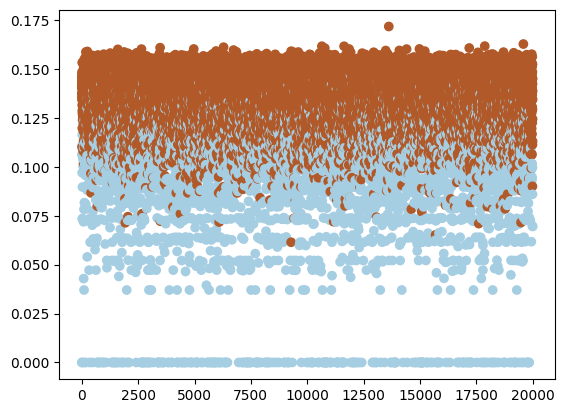

In [ ]:
plt.scatter(num,l, c = labels_kmeans, cmap= "Paired")
plt.show()

In [ ]:
from sklearn.metrics import silhouette_score
print(silhouette_score(comments_transformed,labels_kmeans))

0.2615331625809276


# Dimensionality Reduction using Kmeans

In [ ]:
from sklearn.decomposition import PCA
pca = PCA(n_components = 2)
X1 = pca.fit_transform(comments_transformed)

In [ ]:
kmeans1 = KMeans(2)
kmeans1.fit(X1)
labels_kmeans1 = kmeans1.fit_predict(X1)

In [ ]:
print(silhouette_score(X1,labels_kmeans1))

0.5186953535438021


In [ ]:
from sklearn.cluster import KMeans
from sklearn.metrics import silhouette_score
import numpy as np

n_clusters_range = range(2, 21)  # Number of clusters from 2 to 20
output = []

for n_clusters in n_clusters_range:
    labels = KMeans(n_clusters=n_clusters, random_state=42).fit(X1).labels_
    score = silhouette_score(X1, labels)
    output.append((n_clusters, score))

n_clusters, score = sorted(output, key=lambda x: x[-1])[-1]
print(f"Best silhouette_score: {score}")
print(f"n_clusters: {n_clusters}")

Best silhouette_score: 0.5186682975445809
n_clusters: 2


# Dimensionality Reduction using TruncatedSVD

As the data is sparse we can use truncated SVD for dimensionality reduction PCA is not for sparse data compared to truncated SVD

Number of PCA : 25



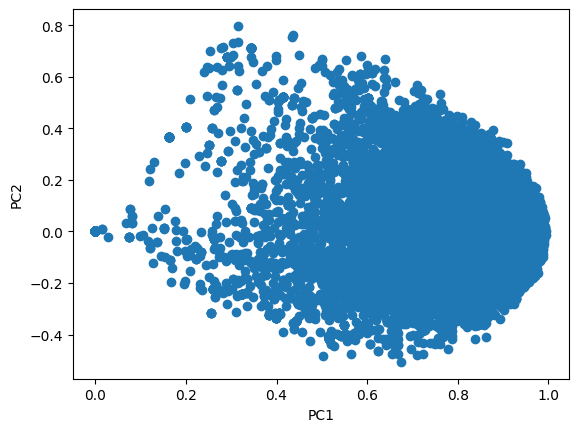

In [ ]:
from sklearn.decomposition import TruncatedSVD


# create a new TruncatedSVD object with the desired number of components
n_components = 25
svd = TruncatedSVD(n_components=n_components)

# fit the TruncatedSVD object to the data and transform the data
comments_transformed_svd = svd.fit_transform(comments_transformed)

print("Number of PCA :", len(comments_transformed_svd[0]))
print()

# plot the first two principal components
import matplotlib.pyplot as plt
plt.scatter(comments_transformed_svd[:, 0], comments_transformed_svd[:, 1])
plt.xlabel("PC1")
plt.ylabel("PC2")
plt.show()

In [ ]:
from sklearn.cluster import KMeans
from sklearn.metrics import silhouette_score

scores = []

for n_clusters in range(2, 21):
    kmeans = KMeans(n_init = 10,n_clusters=n_clusters, random_state=42)
    kmeans.fit(comments_transformed_svd)
    labels = kmeans.labels_
    sil_score = silhouette_score(comments_transformed_svd, labels)
    scores.append(sil_score)

# find the value of n_clusters that gives the maximum Silhouette score
best_n_clusters = np.argmax(scores) + 2  # add 2 because we started from 2 in the loop
best_sil_score = max(scores)
print("Best Value of N_Clusters : ", best_n_clusters)
print("Silhouette Score : ", best_sil_score)

kmeans = KMeans(n_init = 10, n_clusters=best_n_clusters, random_state=42)
kmeans.fit(comments_transformed_svd)
labels = kmeans.labels_

Best Value of N_Clusters :  2
Silhouette Score :  0.2618620300983981


In [ ]:
comments_original = df.iloc[:20000,3]

In [ ]:
comments_original=comments_original.to_numpy()

In [ ]:
# ClusterWise Diving and Printing comments
vectorized_comments = {}
comments = {}
for i in range(2):
  vectorized_comments[i] = []
  comments[i] = []

for i in range(2000):
  vectorized_comments[labels[i]].append(comments_transformed_svd[i])
  comments[labels[i]].append(comments_original[i])


for i in range(2):
  print()
  print("Cluster "+ str(i))
  print()
  index = 1
  for j in comments[i]:
    print(str(index) + ") " + j)
    index += 1
# No useful cluster formed which contains all spam comments


Cluster 0

1) So stretching is bad? Please tell me I don't know
2) So you made a video on antimatter and only talked about why it costs so much and not about how it comes about smashing protons together, kinda important or that the fact that none contained antimatter causes, well how Gould you put this? Absolute death. 11 million people watched your useless video and still have no idea about Cern, antimatter and what Stephen Hawkins said ya know about how antimatter and cern are certainly going to be the cause of the destruction of earth. Ignorance is soooooo annoying there’s no excuse for it
3) Gotta double monetize those videos.














Good to know that underneath that bleeding liberal heart is still a good ole captiliist.
4) The broom head is heavier because the handle sticks out more.
5) I found a couple of pounds of it in my basement. Maybe we can pay off the fraudulent national debt and then put the FED (or should I say anti-FED) out of power. Then science discovery could

# Z-Score Method

In [ ]:
from scipy.stats import zscore

# Labeling Spams and Non Spam Comments
labels1 = np.empty(len(comments_transformed_svd))
labels1.fill(0)

for i in range(200): #processing in
  z_scores = zscore(comments_transformed_svd[i*100:(i+1)*100])

  # Setting Threshold which detects best outliers(spam comment) by trail and testing error
  threshold = 2
  outlier_indices = np.where(np.abs(z_scores) > threshold)[0]
  labels1[outlier_indices] = 1




# Printing Spam and Non Spam Comments
comments_original = df.iloc[:20000,3].values

spam_comments = []
non_spam_comments = []

for i in range(len(comments_original)):
  if labels1[i] == 0:
    non_spam_comments.append(comments_original[i])
  elif labels1[i] == 1:
    spam_comments.append(comments_original[i])


z_scores = zscore(comments_transformed_svd)


print("Spam Comments : ")
index = 0
for comment in spam_comments:
  print(str(index) + ") " + comment)
  index += 1
print()

Spam Comments : 
0) So stretching is bad? Please tell me I don't know
1) Before 100!
2) So you made a video on antimatter and only talked about why it costs so much and not about how it comes about smashing protons together, kinda important or that the fact that none contained antimatter causes, well how Gould you put this? Absolute death. 11 million people watched your useless video and still have no idea about Cern, antimatter and what Stephen Hawkins said ya know about how antimatter and cern are certainly going to be the cause of the destruction of earth. Ignorance is soooooo annoying there’s no excuse for it
3) Even the sponsor is cool
4) Gotta double monetize those videos.














Good to know that underneath that bleeding liberal heart is still a good ole captiliist.
5) The broom head is heavier because the handle sticks out more.
6) shrunken head
7) I found a couple of pounds of it in my basement. Maybe we can pay off the fraudulent national debt and then put the FED (or 

# LocalOutlierFactor Model

In [ ]:
from sklearn.neighbors import LocalOutlierFactor
labels2 = np.empty(len(comments_transformed_svd))
labels2.fill(0)

for i in range(200):
  lof = LocalOutlierFactor(n_neighbors=20, contamination=0.1)
  y_pred = lof.fit_predict(comments_transformed_svd[i*100:(i+1)*100])

  # Find the indices of the outlier points
  outlier_indices = np.where(y_pred == -1)[0]

  # Labeling Spams and Non Spam Comments
  labels2[outlier_indices] = 1


# Printing Spam and Non Spam Comments
comments_original = df.iloc[:20000,3].values

spam_comments = []
non_spam_comments = []

for i in range(len(comments_original)):
  if labels2[i] == 0:
    non_spam_comments.append(comments_original[i])
  elif labels2[i] == 1:
    spam_comments.append(comments_original[i])

print("Spam Comments")
index = 0
for comment in spam_comments:
  print(str(index) + ") " + comment)
  index += 1
print()

# Commented to see spam comments better
# print("Non Spam Comments")
# index = 0
# for comment in non_spam_comments:
#   print(str(index) + ") " + comment)
#   index += 1

Spam Comments
0) So stretching is bad? Please tell me I don't know
1) Before 100!
2) So you made a video on antimatter and only talked about why it costs so much and not about how it comes about smashing protons together, kinda important or that the fact that none contained antimatter causes, well how Gould you put this? Absolute death. 11 million people watched your useless video and still have no idea about Cern, antimatter and what Stephen Hawkins said ya know about how antimatter and cern are certainly going to be the cause of the destruction of earth. Ignorance is soooooo annoying there’s no excuse for it
3) Even the sponsor is cool
4) Gotta double monetize those videos.














Good to know that underneath that bleeding liberal heart is still a good ole captiliist.
5) The broom head is heavier because the handle sticks out more.
6) shrunken head
7) I found a couple of pounds of it in my basement. Maybe we can pay off the fraudulent national debt and then put the FED (or sho

# One Class SVM Model

In [ ]:
from sklearn import svm


# Labeling Spams and Non Spam Comments
labels3 = np.empty(len(comments_transformed_svd))
labels3.fill(0)

# Create an One-Class SVM object and fit the data
for i in range(200):
  clf = svm.OneClassSVM(nu=0.1, kernel='rbf', gamma=5)
  clf.fit(comments_transformed_svd[100*i:100*(i+1)])

# Predict the outliers
  y_pred = clf.predict(comments_transformed_svd)
  outlier_indices = np.where(y_pred == -1)
  labels3[outlier_indices] = 1


# Printing Spam and Non Spam Comments
comments_original = df.iloc[:20000,3].values

spam_comments = []
non_spam_comments = []


for i in range(len(comments_original)):
  if labels3[i] == 0:
    non_spam_comments.append(comments_original[i])
  elif labels3[i] == 1:
    spam_comments.append(comments_original[i])

print("Spam Comments")
index = 0
for comment in spam_comments:
  print(str(index) + ") " + comment)
  index += 1
print()

Streaming output truncated to the last 5000 lines.
9784) Look at you with a cliff-hanger episode!
9785) 14:53 I've heard that music on another channel but I can't remember which, it's bugging me
9786) Yes
9787) Mars have moons
9788) 😚😚😚😚😚
9789) I feel like "famous mathematician" is somewhat of an understatement for Euler, I am more of a Gauss fan myself, but Euler is so damn prolific he almost *is* math. Almost.
9790) 5dnah r0uy n0 em1t hcum 00t evah u0y 51ht gn1daer era u0y f1
9791) I wish Dianna a full and speedy recovery.
9792) Damn, I had no idea.
9793) A mazing!
9794) ❤
9795) I think I saw that mystery on "In Search Of" with Leonard Nimoy decades ago.
9796) Thank you for this video, Diana! (There's a note before ...)
9797) Says, "width of a human hair" ... then I notice her hair is violet. What? Goes back to beginning. How did I miss that?
9798) @Dianna, this topic deserves an in depth discussion in collaboration with other partners.
9799) You've EARNED another subscriber here 
98

# Ensemble Learning

In [ ]:
# Getting Final Labels By Voting of 3 models
labels = []
for i in range(len(labels1)):
  spam = 0
  if(labels1[i] == 1):
    spam += 1
  if(labels2[i] == 1):
    spam += 1
  if(spam >= 1):
    labels.append(1)
  else:
    labels.append(0)

labels = np.array(labels)

In [ ]:
len(labels)

20000

In [ ]:
df.shape

(267904, 5)

In [ ]:
# Printing Spam and Non Spam Comments
comments_original = df.iloc[:200,3]
comments_original = comments_original.to_numpy()

In [ ]:
len(comments_original)

200

In [ ]:
spam_comments = []
non_spam_comments = []

for i in range(len(comments_original)):
  if labels[i] == 0:
    non_spam_comments.append(comments_original[i])
  elif labels[i] == 1:
    spam_comments.append(comments_original[i])

print("Spam Comments")
index = 0
for comment in spam_comments:
  print(str(index) + ") " + comment)
  index += 1
print()

Spam Comments
0) So stretching is bad? Please tell me I don't know
1) Before 100!
2) So you made a video on antimatter and only talked about why it costs so much and not about how it comes about smashing protons together, kinda important or that the fact that none contained antimatter causes, well how Gould you put this? Absolute death. 11 million people watched your useless video and still have no idea about Cern, antimatter and what Stephen Hawkins said ya know about how antimatter and cern are certainly going to be the cause of the destruction of earth. Ignorance is soooooo annoying there’s no excuse for it
3) Even the sponsor is cool
4) Gotta double monetize those videos.














Good to know that underneath that bleeding liberal heart is still a good ole captiliist.
5) The broom head is heavier because the handle sticks out more.
6) shrunken head
7) I found a couple of pounds of it in my basement. Maybe we can pay off the fraudulent national debt and then put the FED (or sho

In [ ]:
from sklearn.neighbors import KNeighborsClassifier
from sklearn.tree import DecisionTreeClassifier

# Knn did'nt gave effective results
# knn = KNeighborsClassifier(n_neighbors = 2)
# knn.fit(comments_transformed, labels)
# comments_transformed_remaining = tfidfconvert.transform(df.iloc[1000:,3])
# labels_remaining = knn.predict(comments_transformed_remaining)

clf = DecisionTreeClassifier(random_state=42)
clf.fit(comments_transformed, labels)
comments_transformed_remaining = tfidfconvert.transform(df.iloc[20000:,3])
labels_remaining = clf.predict(comments_transformed_remaining)

In [ ]:
len(labels_remaining)

247904

In [ ]:
final_labels = np.concatenate([labels, labels_remaining])

# Prediction a part of remaining Data

In [ ]:
comments_original = df.iloc[20000:21000,3]

In [ ]:
comments_original = comments_original.to_numpy()

In [ ]:
spam_comments = []
non_spam_comments = []

for i in range(len(comments_original)):
  if labels_remaining[i] == 0:
    non_spam_comments.append(comments_original[i])
  elif labels_remaining[i] == 1:
    spam_comments.append(comments_original[i])

print("Spam Comments")
index = 0
for comment in spam_comments:
  print(str(index) + ") " + comment)
  index += 1
print()

Spam Comments
0) Doesn't "centre of mass" mean that is the centre of mass? as in there's an equal amount of mass on the left vs the right?
1) Pin me
2) good video, with the cringest jokes.
I love it

